# **라이브러리**

In [1]:
import pandas as pd
import numpy as np

from imblearn.under_sampling import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier

from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix, roc_auc_score
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'malgun gothic'

# **함수모음**

## **모델링**

In [2]:
def modeling(model, X, y, test):    
    model.fit(X, y)
    pred = model.predict_proba(test)
    pred = (pred[:,0] < 0.5)*1         # threshold 부도기업일 확률이 10% 이상이면 부도로 판단해라.
    return pred

def modeling_(model, X, y, test):    
    model.fit(X, y)
    pred = model.predict_proba(test)
    pred = (pred[:,0] < optimal_threshold)*1         # threshold 부도기업일 확률이 10% 이상이면 부도로 판단해라.
    return pred

######################################## Split train, test
def splittrain(data):
    subdata = data.sort_values(by='년').reset_index(drop=True)
    data = subdata.loc[subdata['년'] < 2015]
    return data

def splittesst(data):
    global test
    subdata = data.sort_values(by='년').reset_index(drop=True)
    test = subdata.loc[subdata['년'] >= 2015]
    return test

## **스코어**

In [3]:
def scoring(y_true, y_pred):
    print('accuracy:', accuracy_score(y_true,y_pred))
    print('f1-Score:', f1_score(y_true, y_pred))
    print('Recall:',recall_score(y_true, y_pred))
    print('Precision:',precision_score(y_true, y_pred))
    print(confusion_matrix(y_true, y_pred))

# **데이터 나누기**

## **재무데이터**

In [4]:
dataset = pd.read_csv(r'C:\Users\JH\Desktop\Final\Ubion-CorporateBankruptcyAnalysis\Code\JH\data\ver3\aj_0year.csv')
dataset1 = pd.read_csv(r'C:\Users\JH\Desktop\Final\Ubion-CorporateBankruptcyAnalysis\Code\JH\data\ver3\aj_1year.csv')
dataset2 = pd.read_csv(r'C:\Users\JH\Desktop\Final\Ubion-CorporateBankruptcyAnalysis\Code\JH\data\ver3\aj_2year.csv')
dataset3 = pd.read_csv(r'C:\Users\JH\Desktop\Final\Ubion-CorporateBankruptcyAnalysis\Code\JH\data\ver3\aj_3year.csv')
dataset4 = pd.read_csv(r'C:\Users\JH\Desktop\Final\Ubion-CorporateBankruptcyAnalysis\Code\JH\data\ver3\aj_4year.csv')

drop_features = ['회사명', '거래소코드', '회계년도','년', 'key', '부도','최대주주_변경', '회계처리위반', '횡령배임', '신종채권', '영업조업중단',
'출자목적_투자','출자목적_경영권', '출자목적_영업이익','종가변동률','신종채권_운영', '신종채권_시설', '신종채권_기타']

dataset.columns

Index(['회사명', '거래소코드', '회계년도', '설비투자효율', '총자본투자효율', '부채구성비율', '비유동장기적합률',
       '재고자산보유기간', '매출채권회수기간', '매입채무회전률', '경영자본회전률', '경영자본순이익률', '자기자본순이익률',
       '자기자본증가율', '년', 'key', '대표이사_변경', '최대주주_변경', '회계처리위반', '횡령배임', '신종채권',
       '영업조업중단', '종가변동률', '신종채권_운영', '신종채권_시설', '신종채권_기타', '출자목적_투자',
       '출자목적_경영권', '출자목적_영업이익', '부도'],
      dtype='object')

## **재무데이터 + 비재무데이터**

In [23]:
print(ajdataset.shape,ajdataset1.shape,ajdataset2.shape)
print(dataset.shape,dataset1.shape,dataset2.shape)

(26832, 29) (26498, 29) (26165, 29)
(26832, 31) (26498, 31) (26165, 31)


In [5]:
ajdataset = pd.read_csv(r'C:\Users\JH\Desktop\Final\Ubion-CorporateBankruptcyAnalysis\Code\JH\data\ver2\0years_agostep3.csv')
ajdataset1 = pd.read_csv(r'C:\Users\JH\Desktop\Final\Ubion-CorporateBankruptcyAnalysis\Code\JH\data\ver2\1years_agostep3.csv')
ajdataset2 = pd.read_csv(r'C:\Users\JH\Desktop\Final\Ubion-CorporateBankruptcyAnalysis\Code\JH\data\ver2\2years_agostep3.csv')
ajdataset3 = pd.read_csv(r'C:\Users\JH\Desktop\Final\Ubion-CorporateBankruptcyAnalysis\Code\JH\data\ver2\3years_agostep3.csv')
ajdataset4 = pd.read_csv(r'C:\Users\JH\Desktop\Final\Ubion-CorporateBankruptcyAnalysis\Code\JH\data\ver2\4years_agostep3.csv')

drop_feature = ['회사명', '거래소코드', '회계년도','년', 'key', '부도']

ajdataset.columns

Index(['회사명', '거래소코드', '회계년도', '설비투자효율', '총자본투자효율', '부채구성비율', '비유동장기적합률',
       '재고자산보유기간', '매출채권회수기간', '매입채무회전률', '경영자본회전률', '경영자본순이익률', '자기자본순이익률',
       '자기자본증가율', '년', 'key', '부도', '대표이사_변경', '최대주주_변경', '회계처리위반', '횡령배임',
       '영업조업중단', '종가변동률', '출자목적_투자', '출자목적_경영권', '출자목적_영업이익', '신종채권_운영',
       '신종채권_시설', '신종채권_기타'],
      dtype='object')

In [6]:
dataset_ = splittrain(dataset)
test_ = splittesst(dataset)
dataset1_ = splittrain(dataset1)
test1_ = splittesst(dataset1)
dataset2_ = splittrain(dataset2)
test2_ = splittesst(dataset2)
dataset3_ = splittrain(dataset3)
test3_ = splittesst(dataset3)
dataset4_ = splittrain(dataset4)
test4_ = splittesst(dataset4)

ajdataset_ = splittrain(ajdataset)
ajtest_ = splittesst(ajdataset)
ajdataset1_ = splittrain(ajdataset1)
ajtest1_ = splittesst(ajdataset1)
ajdataset2_ = splittrain(ajdataset2)
ajtest2_ = splittesst(ajdataset2)
ajdataset3_ = splittrain(ajdataset3)
ajtest3_ = splittesst(ajdataset3)
ajdataset4_ = splittrain(ajdataset4)
ajtest4_ = splittesst(ajdataset4)

X = dataset_.drop(drop_features, axis=1)
X1 = dataset1_.drop(drop_features, axis=1)
X2 = dataset2_.drop(drop_features, axis=1)
X3 = dataset3_.drop(drop_features, axis=1)
X4 = dataset4_.drop(drop_features, axis=1)

y = dataset_['부도']
y1 = dataset1_['부도']
y2 = dataset2_['부도']
y3 = dataset3_['부도']
y4 = dataset4_['부도']

X_test =test_.drop(drop_features, axis=1)
X1_test =test1_.drop(drop_features, axis=1)
X2_test =test2_.drop(drop_features, axis=1)
X3_test =test3_.drop(drop_features, axis=1)
X4_test =test4_.drop(drop_features, axis=1)

y_test= test_['부도']
y1_test =test1_['부도']
y2_test =test2_['부도']
y3_test =test3_['부도']
y4_test =test4_['부도']

print(X3_test.shape, y3_test.shape)

ajX = ajdataset_.drop(drop_feature, axis=1)
ajX1 = ajdataset1_.drop(drop_feature, axis=1)
ajX2 = ajdataset2_.drop(drop_feature, axis=1)
ajX3 = ajdataset3_.drop(drop_feature, axis=1)
ajX4 = ajdataset4_.drop(drop_feature, axis=1)

ajy = ajdataset_['부도']
ajy1 = ajdataset1_['부도']
ajy2 = ajdataset2_['부도']
ajy3 = ajdataset3_['부도']
ajy4 = ajdataset4_['부도']

ajX_test =ajtest_.drop(drop_feature, axis=1)
ajX1_test =ajtest1_.drop(drop_feature, axis=1)
ajX2_test =ajtest2_.drop(drop_feature, axis=1)
ajX3_test =ajtest3_.drop(drop_feature, axis=1)
ajX4_test =ajtest4_.drop(drop_feature, axis=1)

ajy_test= ajtest_['부도']
ajy1_test =ajtest1_['부도']
ajy2_test =ajtest2_['부도']
ajy3_test =ajtest3_['부도']
ajy4_test =ajtest4_['부도']

print(ajX3_test.shape, ajy3_test.shape)

(8381, 12) (8381,)
(8381, 23) (8381,)


# **데이터 검증 및 언더샘플링**

In [7]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

mdn = ['Decision Tree','Random Forest','Adaboost','logistic', 'KNN','SVC','lightGBM','Catboost','MLP','Xgboost']

def run_skfold(feature, target):
    X, y = RandomUnderSampler(random_state=1).fit_resample(feature, target) # RandomUnderSampling
    skf = StratifiedKFold(n_splits=4, shuffle=True)
    arr = [] # Validation Set's Accuracy
    models = [DecisionTreeClassifier(),RandomForestClassifier(),AdaBoostClassifier(),LogisticRegression(),KNeighborsClassifier(),
    SVC(probability=True),LGBMClassifier(),CatBoostClassifier(silent=True),MLPClassifier(),XGBClassifier()]

    for model in models:
        val_pred = 0
        for train_index, val_index in skf.split(X,y):
            # print("TRAIN:", train_index, "TEST:", val_index)
            X_train, X_val = X[train_index], X[val_index]
            y_train, y_val = y[train_index], y[val_index]
            val_pred += accuracy_score(y_val, modeling(model, X_train, y_train, X_val))
        arr.append(val_pred/4)
    return arr # each models accuracy

In [59]:
# ,2,3,4 숫자구분해줘야함
X = np.array(X3)
ajX = np.array(ajX3)

y = y3
ajy = ajy3

ajX_test = ajX3_test
X_test = X3_test

y_test = np.array(y3_test)
ajy_test = np.array(ajy3_test)

vanval = run_skfold(X, y)
ajval = run_skfold(ajX,ajy)

[13:09:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:09:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:09:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:09:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

## **테스트 셋 검증**

In [60]:
X, y = RandomUnderSampler(random_state=1).fit_resample(X, y)
########################################################################################## 데이터셋 1
dt_clf = modeling(DecisionTreeClassifier(), X, y, X_test)
rf_clf = modeling(RandomForestClassifier(),X, y, X_test)
ada_clf = modeling(AdaBoostClassifier(), X, y, X_test)
lg_clf = modeling(LogisticRegression(), X, y, X_test)
knn_clf = modeling(KNeighborsClassifier(), X, y, X_test)
svc_clf = modeling(SVC(probability=True), X, y, X_test)
lgmb_clf = modeling(LGBMClassifier(), X, y, X_test)
cat_clf = modeling(CatBoostClassifier(silent=True),X, y, X_test)
mlp_clf = modeling(MLPClassifier(),X, y, X_test)
xgb_clf = modeling(XGBClassifier(),X, y, X_test)

ajX, ajy = RandomUnderSampler(random_state=1).fit_resample(ajX, ajy)
########################################################################################## 데이터셋 2
ajdt_clf = modeling(DecisionTreeClassifier(), ajX, ajy, ajX_test)
ajrf_clf = modeling(RandomForestClassifier(),ajX, ajy, ajX_test)
ajada_clf = modeling(AdaBoostClassifier(), ajX, ajy, ajX_test)
ajlg_clf = modeling(LogisticRegression(), ajX, ajy, ajX_test)
ajknn_clf = modeling(KNeighborsClassifier(), ajX, ajy, ajX_test)
ajsvc_clf = modeling(SVC(probability=True), ajX, ajy, ajX_test)
ajlgmb_clf = modeling(LGBMClassifier(), ajX, ajy, ajX_test)
ajcat_clf = modeling(CatBoostClassifier(silent=True),ajX, ajy, ajX_test)
ajmlp_clf = modeling(MLPClassifier(),ajX, ajy, ajX_test)
ajxgb_clf = modeling(XGBClassifier(),ajX, ajy, ajX_test)

[13:10:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:10:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


accuracy: 0.7274788211430617
f1-Score: 0.017211703958691912
Recall: 0.6060606060606061
Precision: 0.008729812309035356
[[6077 2271]
 [  13   20]]


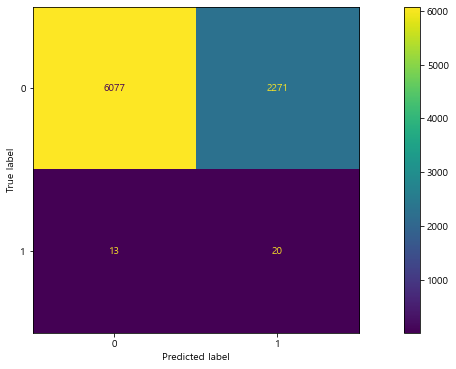

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, cat_clf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

plt.rcParams['figure.figsize'] = (16,6)
disp.plot()

scoring(y_test, cat_clf)

accuracy: 0.7275981386469395
f1-Score: 0.018064516129032256
Recall: 0.6363636363636364
Precision: 0.009162303664921465
[[6077 2271]
 [  12   21]]


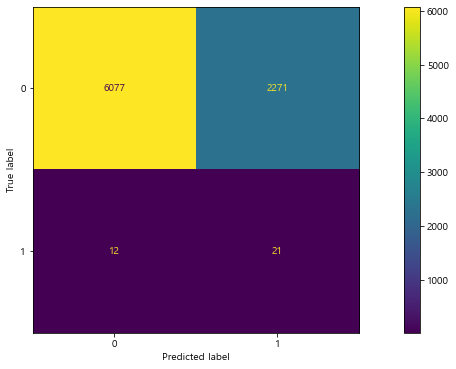

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(ajy_test, ajcat_clf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

plt.rcParams['figure.figsize'] = (16,6)
disp.plot()

scoring(ajy_test, ajcat_clf)

In [133]:
""" for i in arr:
    print(scoring(y_test , i))
    print('-'*60)

for i in ajarr:
    print(scoring(y_test , i))
    print('-'*60) """

" for i in arr:\n    print(scoring(y_test , i))\n    print('-'*60)\n\nfor i in ajarr:\n    print(scoring(y_test , i))\n    print('-'*60) "

In [134]:
arr =[dt_clf,rf_clf,ada_clf,lg_clf,knn_clf,svc_clf,lgmb_clf,cat_clf,mlp_clf,xgb_clf]
ajarr = [ajdt_clf,ajrf_clf,ajada_clf,ajlg_clf,ajknn_clf,ajsvc_clf,ajlgmb_clf,ajcat_clf,ajmlp_clf,ajxgb_clf]

In [121]:
def test_acc(y_true, arr_):
    acc = []
    for i in arr_:
        acc.append(round(accuracy_score(y_true, i),4))
    return acc

ogntest = test_acc(y_test, arr)
ajdtest = test_acc(ajy_test, ajarr)

def get_f1(y_true, arr_):
    f1 = []
    for i in arr_:
        f1.append(round(f1_score(y_true, i),4)) # average='weighted'
    return f1
     
ognf1 = get_f1(y_test, arr)
ajdf1 = get_f1(ajy_test, ajarr)

def get_rc(y_true, arr_):
    rc = []
    for i in arr_:
        rc.append(round(recall_score(y_true, i),4))
    return rc

ognrc = get_rc(y_test, arr)
ajdrc = get_rc(ajy_test, ajarr)

def get_pc(y_true, arr_):
    pc = []
    for i in arr_:
        pc.append(round(precision_score(y_true, i, pos_label=1),4))
    return pc

ognpc = get_pc(y_test, arr)
ajdpc = get_pc(ajy_test, ajarr)



In [122]:
subsetone = pd.DataFrame({'model': mdn, 'SET1 val Accuracy': vanval, 'SET1 test Accuracy' : ogntest, 'SET1 test f1-Score': ognf1, 'SET1 test Precision': ognpc, 'SET1 test Recall': ognrc, 
                                        'SET2 val Accuracy' : ajval, 'SET2 test Accuracy' : ajdtest, 'SET2 test f1_Score': ajdf1, 'SET2 test Precision': ajdpc, 'SET2 test Recall': ajdrc})
subsetone.to_csv('43년차검증.csv', index=False)

In [123]:
asd = pd.read_csv(r'C:\Users\JH\Desktop\Final\Ubion-CorporateBankruptcyAnalysis\Code\JH\code\modeling\4년차검증.csv')
asd

,model,SET1 val Accuracy,SET1 test Accuracy,SET1 test f1-Score,SET1 test Precision,SET1 test Recall,SET2 val Accuracy,SET2 test Accuracy,SET2 test f1_Score,SET2 test Precision,SET2 test Recall
0,Decision Tree,0.587100,0.5508,0.7080,0.9950,0.5508,0.595015,0.6142,0.7587,0.9950,0.6142
1,Random Forest,0.676817,0.6333,0.7730,0.9955,0.6333,0.672814,0.6569,0.7905,0.9956,0.6569
2,Adaboost,0.647717,0.6584,0.7916,0.9957,0.6584,0.660951,0.6782,0.8059,0.9949,0.6782
3,logistic,0.650522,0.5399,0.6988,0.9952,0.5399,0.651692,0.7479,0.8533,0.9958,0.7479
4,KNN,0.613429,0.6582,0.7914,0.9956,0.6582,0.625334,0.6588,0.7919,0.9954,0.6588
5,SVC,0.529101,0.0028,0.0003,0.9974,0.0028,0.525007,0.0029,0.0005,0.9974,0.0029
6,lightGBM,0.649088,0.5902,0.7399,0.9952,0.5902,0.641124,0.6219,0.7645,0.9951,0.6219
7,Catboost,0.672814,0.6388,0.7771,0.9957,0.6388,0.668839,0.6692,0.7994,0.9956,0.6692
8,MLP,0.608194,0.4868,0.6522,0.9959,0.4868,0.604198,0.4010,0.5698,0.9953,0.4010
9,Xgboost,0.635874,0.5947,0.7435,0.9950,0.5947,0.653056,0.6202,0.7633,0.9951,0.6202


In [73]:
scoring(y_test, cat_clf)

accuracy: 0.8368558951965066
f1-Score: 0.9051778370849546
Recall: 0.8368558951965066
Precision: 0.03134796238244514
[[4761  927]
 [   7   30]]


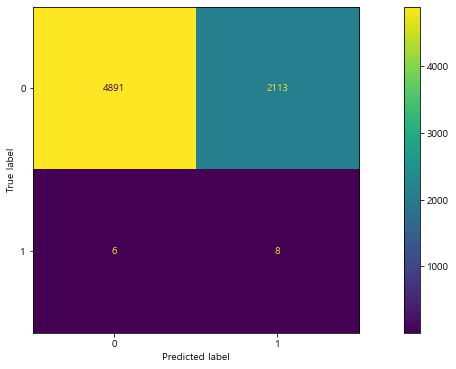

In [124]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, ajcat_clf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)


plt.rcParams['figure.figsize'] = (16,6)
disp.plot()

In [89]:
asd[['model','SET1 test f1-Score','SET1 test Precision','SET1 test Recall']].sort_values(by='SET1 test Recall', ascending=False)

,model,SET1 test f1-Score,SET1 test Precision,SET1 test Recall
5,SVC,0.0124,0.0062,1.0000
0,Decision Tree,0.0364,0.0186,0.8302
8,MLP,0.0539,0.0278,0.8113
1,Random Forest,0.0519,0.0268,0.7925
6,lightGBM,0.0472,0.0243,0.7925
9,Xgboost,0.0488,0.0252,0.7925
7,Catboost,0.0533,0.0276,0.7736
2,Adaboost,0.0487,0.0251,0.7547
3,logistic,0.0640,0.0336,0.6792
4,KNN,0.0534,0.0278,0.6792


In [90]:
asd[['model','SET2 test f1_Score','SET2 test Precision','SET2 test Recall']].sort_values(by='SET2 test Recall', ascending=False)

,model,SET2 test f1_Score,SET2 test Precision,SET2 test Recall
5,SVC,0.0124,0.0062,1.0000
1,Random Forest,0.0648,0.0337,0.8302
7,Catboost,0.0643,0.0335,0.8302
2,Adaboost,0.0553,0.0286,0.8113
6,lightGBM,0.0583,0.0303,0.8113
0,Decision Tree,0.0338,0.0173,0.7547
8,MLP,0.0472,0.0243,0.7547
9,Xgboost,0.0540,0.0280,0.7547
3,logistic,0.0489,0.0253,0.6981
4,KNN,0.0552,0.0288,0.6792
